# Consumer

In [1]:
# !pip install kafka

In [2]:
#importing the necessary libraries

import json
import pandas as pd
from kafka import KafkaConsumer
from time import sleep
import time 


consumer = KafkaConsumer('ISS_data', bootstrap_servers=['localhost:9092'], consumer_timeout_ms=8000)
lat_long = []
for message in consumer:
    data= json.loads(message.value)
    lat_long.append(data['iss_position'])
 
        

In [3]:
df= pd.DataFrame(lat_long)
df=df.astype({'longitude':'float','latitude': 'float'})

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
gdf = geopandas.GeoDataFrame( df, geometry = geopandas.points_from_xy(df.longitude, df.latitude))

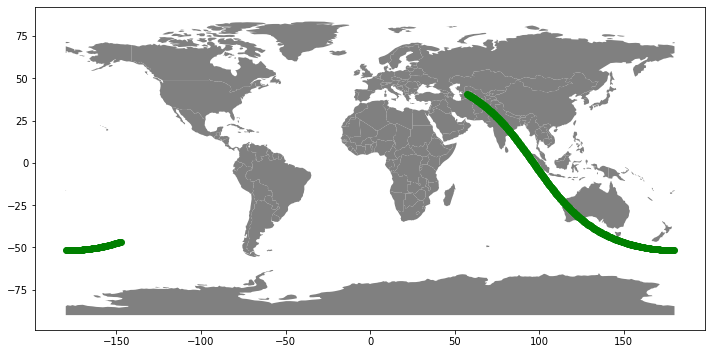

In [5]:
world_map = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12,6))
world_map.plot(color ="grey", ax=ax)

gdf.plot(ax=ax, color='green')
plt.show()